# Self organizing maps (SOM)

**To install MiniSom in the notebook run this cell, in the case of not working run this and the code in your local system**


In [10]:
pip install -i https://test.pypi.org/simple/ MiniSom==1.0

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [11]:
#perparing the data set for  som
import pandas as pd
df = pd.read_csv(r'statlog_data_set.csv')
df = pd.DataFrame(df)
 
#implementing the PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
dfnew1=principalDf['principal component 1']
dfnew2=principalDf['principal component 2']
dfnew = []

for i,j in zip(dfnew1,dfnew2):
  dfnew.append([i,j])
print(dfnew)


[[275.3084941230962, 0.1817775368041024], [154.3796050055724, -82.98296776319764], [174.43044493473295, 68.14124516818961], [121.7919125370938, 9.799106076341324], [84.03912415524084, -10.863172545109766], [64.13360446632785, -19.81787200354674], [55.897997040346176, -23.472185565705406], [58.0931902368821, -17.82946484598452], [63.84202204520213, -10.79339832997814], [76.50651529225834, -2.8437188244967238], [62.16188348816787, -12.574638626217121], [26.968883862082535, -31.941468447397863], [23.837045055878278, -36.35792547117331], [19.231462257163507, -36.60167803503708], [4.478294615545193, -44.94567843551819], [-2.3786613494047506, -48.13631740470704], [-19.352526994884993, -52.72473223024777], [-25.97701200613248, -55.22386153470284], [-23.152452826932937, -48.19901259150439], [-11.135613661843928, -35.78697958025633], [9.383645944517747, -21.261492919913884], [73.97394594892488, 0.7258444654513251], [98.97990759482107, 0.7670586174409938], [71.77990305010842, -2.2328103144099294

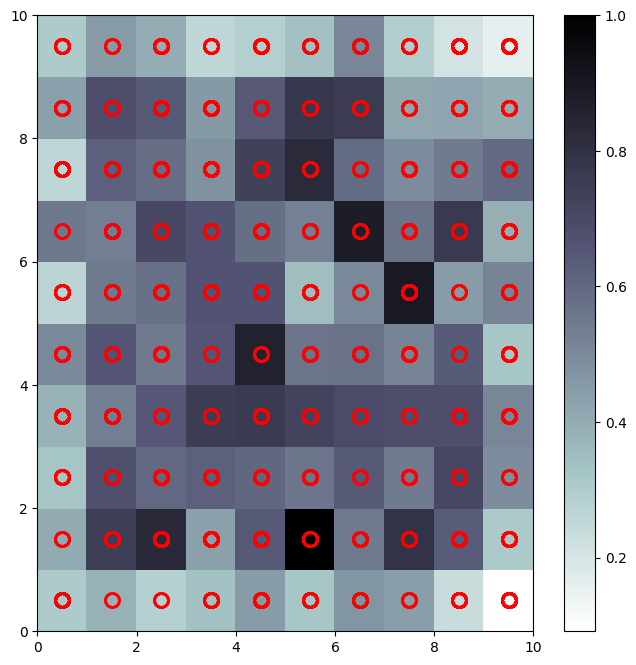

In [12]:
from minisom import MiniSom
import numpy as np

data = dfnew
data = np.array(data)


# Determine the input dimensions
input_dimensions = data.shape[1]

# Define the SOM grid dimensions
grid_rows = 10
grid_columns = 10

# Initialize the SOM
som = MiniSom(grid_rows, grid_columns, input_dimensions, sigma=0.5, learning_rate=0.5)

# Normalize the data
data = np.apply_along_axis(lambda x: x / np.linalg.norm(x), 1, data)

# Train the SOM
som.train_random(data, 100)  # train for 100 iterations

# Plotting the SOM
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the data
for i, x in enumerate(data):
    w = som.winner(x)  # getting the winner
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None', markeredgecolor='r', markersize=10, markeredgewidth=2)
plt.show()
